In [1]:
import pandas as pd

df = pd.read_csv('fish_all.csv')

In [2]:
df.loc[df['Species']=='Perch','Species'] = 0
df.loc[df['Species']=='Bream','Species'] = 1
df.loc[df['Species']=='Roach','Species'] = 2
df.loc[df['Species']=='Pike','Species'] = 3
df.loc[df['Species']=='Smelt','Species'] = 4
df.loc[df['Species']=='Parkki','Species'] = 5
df.loc[df['Species']=='Whitefish','Species'] = 6
df['Species'] = df['Species'].astype('int32')

In [3]:
features = df[['Weight','Length1']]
outcome = df['Species']

In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features,outcome,random_state=42, stratify=outcome)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

In [6]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(train_features_scaled,train_target)

SVC()

In [7]:
pred = clf.predict(test_features_scaled)

In [8]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target, pred))

0.575


/home/minsuchae/.pyenv/versions/3.9.0/envs/tensorflow_gpu_2.7.0/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


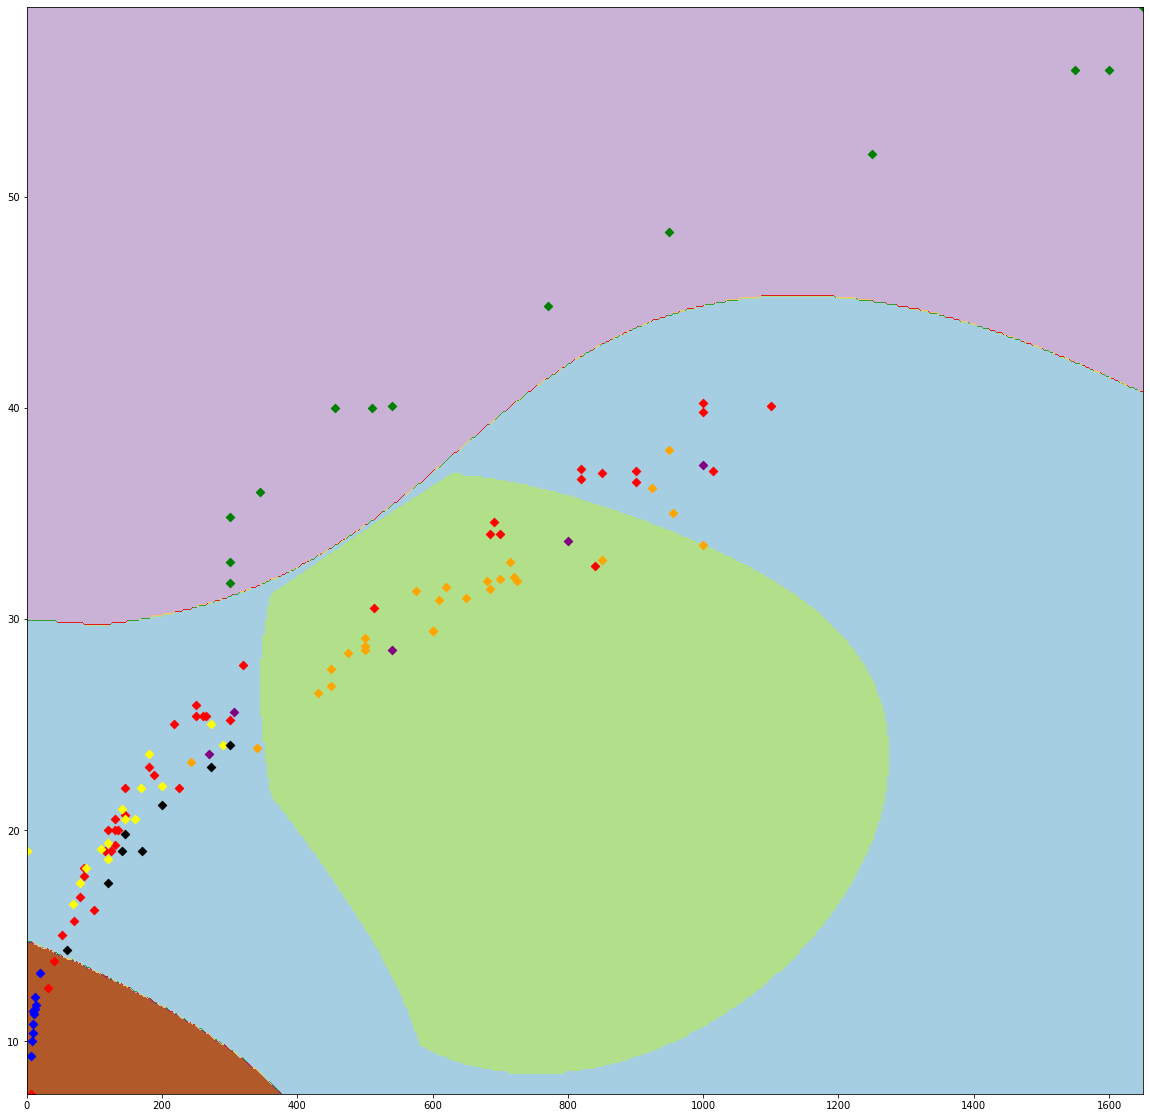

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
color=['red','orange','yellow','green','blue','black','purple']
#      Perch  Bream    Roach    Pike   Smelt   Parkki  Whitefish
plt.figure(figsize=(20,20))
grid_size = 500
x, y = np.meshgrid(np.linspace(features['Weight'].min(), features['Weight'].max(), grid_size),
                   np.linspace(features['Length1'].min(), features['Length1'].max(), grid_size))
scaled =  scaler.transform(np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)]) )
c = clf.predict(scaled).reshape(grid_size, grid_size)

plt.contourf(x, y, c, cmap='Paired')

for species in sorted(outcome.unique()) :
    feature = train_features.loc[train_target==species,['Weight','Length1']]
    plt.scatter(feature['Weight'],feature['Length1'], marker='D', color=color[species])
plt.show()